# XGboost

In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
%pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   --- ------------------------------------ 11.5/124.9 MB 60.0 MB/s eta 0:00:02
   ------ --------------------------------- 20.7/124.9 MB 52.3 MB/s eta 0:00:02
   --------- ------------------------------ 30.4/124.9 MB 49.4 MB/s eta 0:00:02
   ------------- -------------------------- 40.6/124.9 MB 48.8 MB/s eta 0:00:02
   ---------------- ----------------------- 52.4/124.9 MB 50.5 MB/s eta 0:00:02
   ------------------- -------------------- 60.8/124.9 MB 48.4 MB/s eta 0:00:02
   ----------------------- ---------------- 72.1/124.9 MB 48.9 MB/s eta 0:00:02
   ------------------------- -------------- 78.1/124.9 MB 46.6 MB/s eta 0:00:02
   ---------------------------- ----------- 89.1/124.9 MB 47.0 MB/s eta 0:00:01
   ------------------------------- -------- 99.6/124.9 MB 47.4 MB/s eta 0:00:01
   ------------------------------- ------- 101.7/124.9 MB 43.9 MB/s eta 0:00:01
   ---------------------------------- ---- 111.4/

In [4]:
# 데이터 로드 / 전처리
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
# Dmatrix 로 변환
train_dmatrix = xgb.DMatrix(X_train, label = y_train)
test_dmatrix = xgb.DMatrix(X_test, label = y_test)

In [8]:
# 하이퍼파라미터 설정

params= {
    'objective' : 'reg:squarederror',
    'eval_metric' : 'rmse',
    'learning_rate' : 0.1,
    'max_depth' : 4
}

In [9]:
# 모델 훈련
xg_reg = xgb.train(params, train_dmatrix, num_boost_round = 10)

In [10]:
# 예측 및 평가

preds = xg_reg.predict(test_dmatrix)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(f"RMSE : {rmse}")

RMSE : 0.771180525751766


In [11]:
# 라이브러리 임포트
# 그리드 서치, xgboost, 부분 의존성 플롯

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay


In [13]:
# 데이터 로드 및 전처리

data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)
scaler = StandardScaler()

# 정규화
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# XGBoost 모델 생성 및 학습
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state = 42)

In [15]:
#그리드 서치

pram_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5]
}

In [16]:
grid_search =  GridSearchCV(estimator=xgb_model, param_grid=pram_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [17]:
best_model = grid_search.best_estimator_

In [18]:

# 최적 모델로 예측
y_pred = best_model.predict(X_test_scaled)

In [19]:
# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 0.21
R2 Score: 0.84


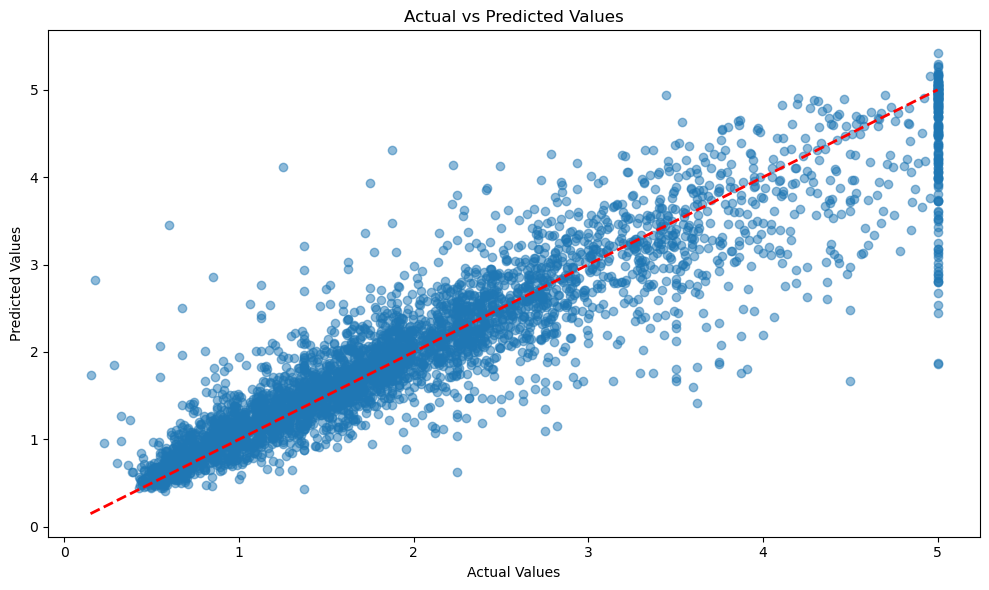

In [20]:
# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.tight_layout()
plt.show()

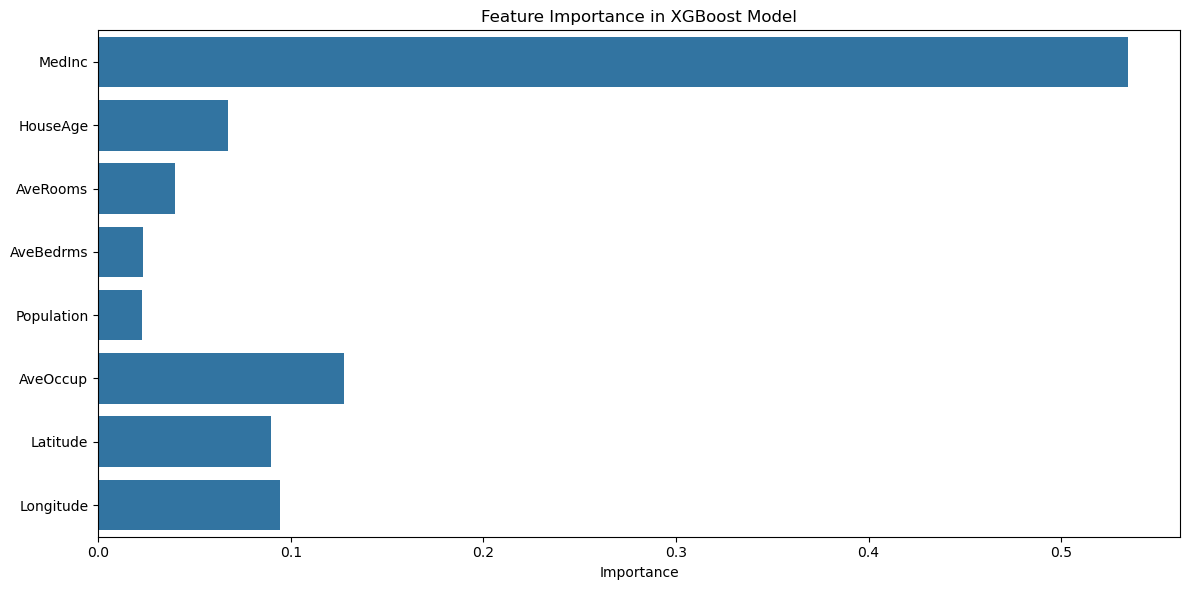

In [21]:
# 특성 중요도 시각화
feature_importance = best_model.feature_importances_
feature_names = data.feature_names

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in XGBoost Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

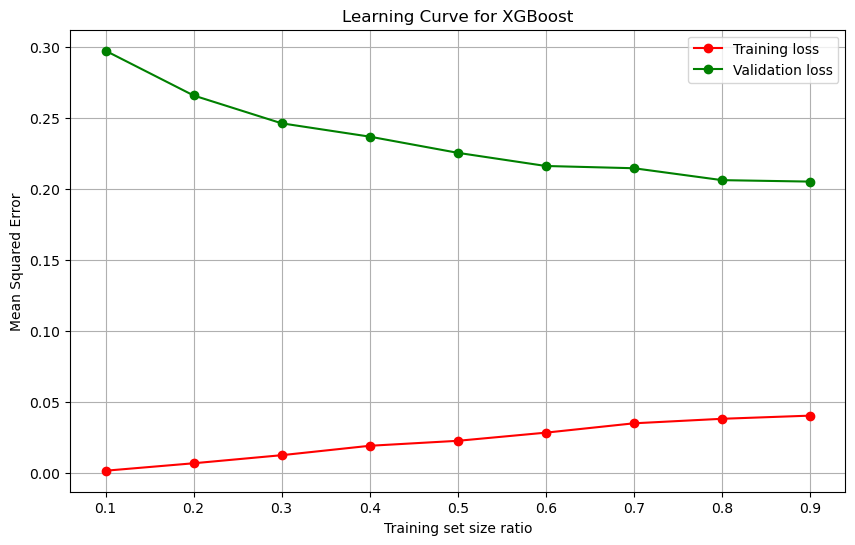

In [22]:
# 학습 곡선
train_sizes = np.linspace(0.1, 0.9, 9)  # 0.1에서 0.9까지 9개의 값
train_losses = []
test_losses = []

for size in train_sizes:
    X_subset, _, y_subset, _ = train_test_split(X_train_scaled, y_train, train_size=size, random_state=42)
    model = xgb.XGBRegressor(**grid_search.best_params_, random_state=42)
    model.fit(X_subset, y_subset)
    train_pred = model.predict(X_subset)
    test_pred = model.predict(X_test_scaled)
    train_losses.append(mean_squared_error(y_subset, train_pred))
    test_losses.append(mean_squared_error(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_losses, 'o-', color="r", label="Training loss")
plt.plot(train_sizes, test_losses, 'o-', color="g", label="Validation loss")
plt.xlabel("Training set size ratio")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.grid()
plt.show()

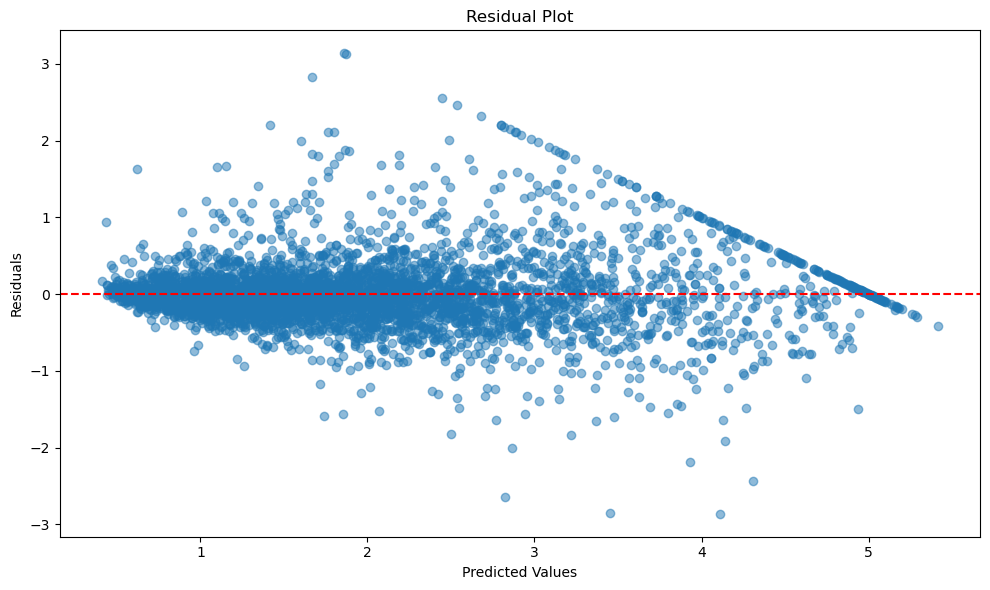

In [23]:
# 잔차 플롯
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

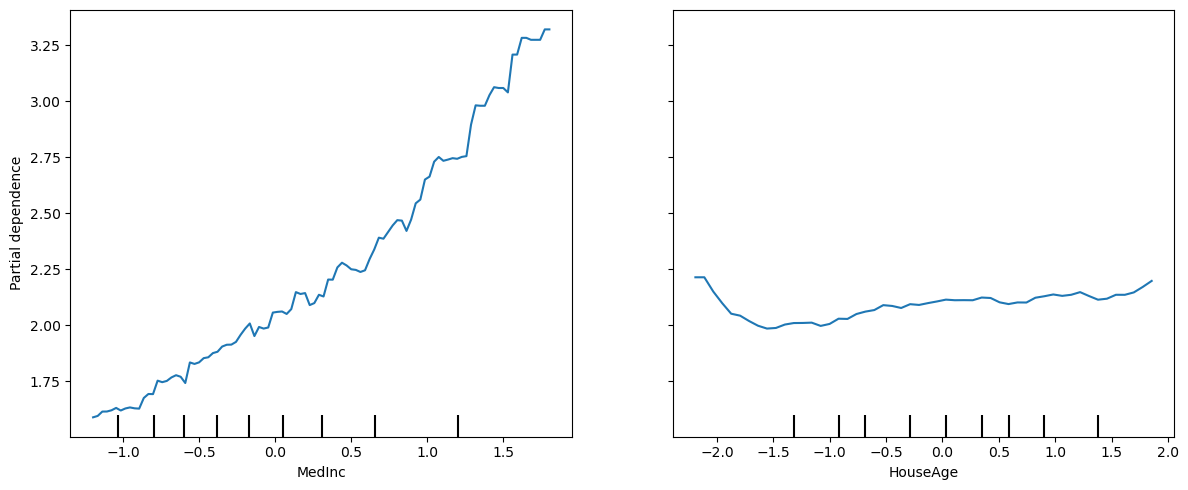

In [24]:
# 부분 의존성 플롯 (처음 두 개의 특성에 대해)
features = [0, 1]  # 첫 번째와 두 번째 특성에 대해 그래프를 그립니다.
fig, ax = plt.subplots(figsize=(12, 5))
PartialDependenceDisplay.from_estimator(estimator=best_model, X=X_train_scaled, features=features, feature_names=data.feature_names, ax=ax)
plt.tight_layout()
plt.show()

In [25]:
# 최적의 하이퍼파라미터 출력
print("\nBest Hyperparameters:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")


Best Hyperparameters:
learning_rate: 0.1
max_depth: 7
min_child_weight: 5
n_estimators: 300


In [26]:
# 교차 검증 점수
print(f"\nBest Cross-Validation Score (MSE): {-grid_search.best_score_:.2f}")


Best Cross-Validation Score (MSE): 0.21
